In [1]:
import numpy as np
# contour plot
from matplotlib import cm 
import matplotlib.pyplot as plt

from tqdm import tqdm

### Question 1 - 1

<img src="Image.png" width="300"/>

### Question 1 - 2

<img src="Image2.png" width="300"/>

### Question 1 - 3

In [2]:
def ff_nn__ReLu(Input):
    Output = np.array([max(0,Ai) for Ai in Input])
    return(Output)

### Question 1 - 4

In [3]:
# Input is an array
def ff_nn__Sigmoid(Input):
    Output = np.array([1/(1+np.exp(-Ai)) for Ai in Input])
    return(Output)

In [4]:
Xfull = np.array([[1,-1],[0,-1],[0,1]])
W = np.array([[1,-1,0],[0,0,0.5]])
print('X:',Xfull)
print('W:',W)

b = np.array([0,0,1])
print('b:',b)

V = np.array([1,0,-1])
print('V:',V)

c = np.array([1])
print('c:',c)

X: [[ 1 -1]
 [ 0 -1]
 [ 0  1]]
W: [[ 1.  -1.   0. ]
 [ 0.   0.   0.5]]
b: [0 0 1]
V: [ 1  0 -1]
c: [1]


In [5]:
for i in range(len(Xfull)):
    # take sample input
    X = Xfull[i]
    # hidden layer
    H_in = np.matmul(X,W) + b
    H = ff_nn__ReLu(H_in)
    # output layer
    y_in = np.matmul(H,V) + c 
    yhat = ff_nn__Sigmoid(y_in)
    print(yhat)

[0.81757448]
[0.62245933]
[0.37754067]


### Question 2 - 1

$\frac{df}{dx} = -3x^2-200(y^2-x)$  

$\frac{df}{dy} = 400(y^2 - x)y$

### Question 2 - 2

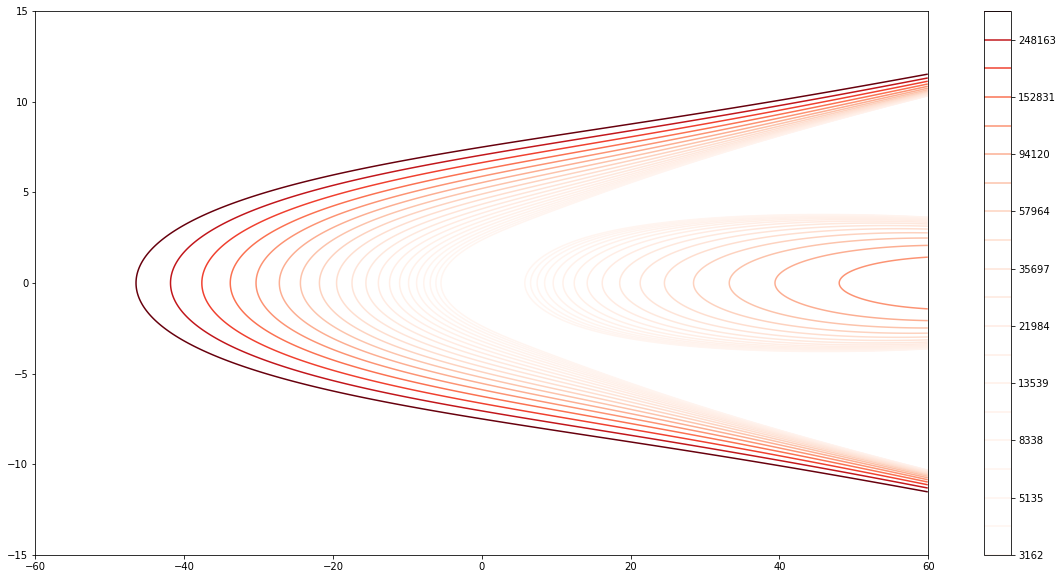

In [6]:
delta = 0.05
x = np.arange(-60, 60, delta)
y = np.arange(-20, 20, delta)

X, Y = np.meshgrid(x, y)
Z = (1-X**3)+100*(Y**2-X)**2

plt.subplots(figsize=(20,10))
plt.xlim([-60,60])
plt.ylim([-15,15])
plt.contour(X, Y, Z, np.logspace(3.5,5.5,20,base=10),cmap=cm.Reds)
plt.colorbar()

### Question 2 - 3

In [7]:
def grad_f(betas):
    Beta_0, Beta_1 = betas
    dLdBeta_0 = -3*Beta_0**2 - 200*(Beta_1**2-Beta_0)
    dLdBeta_1 = 400*(Beta_1**2-Beta_0)*Beta_1
    
    return(np.array([dLdBeta_0, dLdBeta_1]))
    
    
def grad_descent(starting_point,iters,lr):
    
    betas = starting_point
    betas_path = [betas]
    
    for i in range(iters):
        grad = grad_f(betas)
        betas = betas - lr*grad
        betas_path.append(betas)
    
    return(np.array(betas_path))

Text(0.5, 1.0, 'Gradient Descent - Contour Plot on Log Scale - Learning Rate: 0.000100')

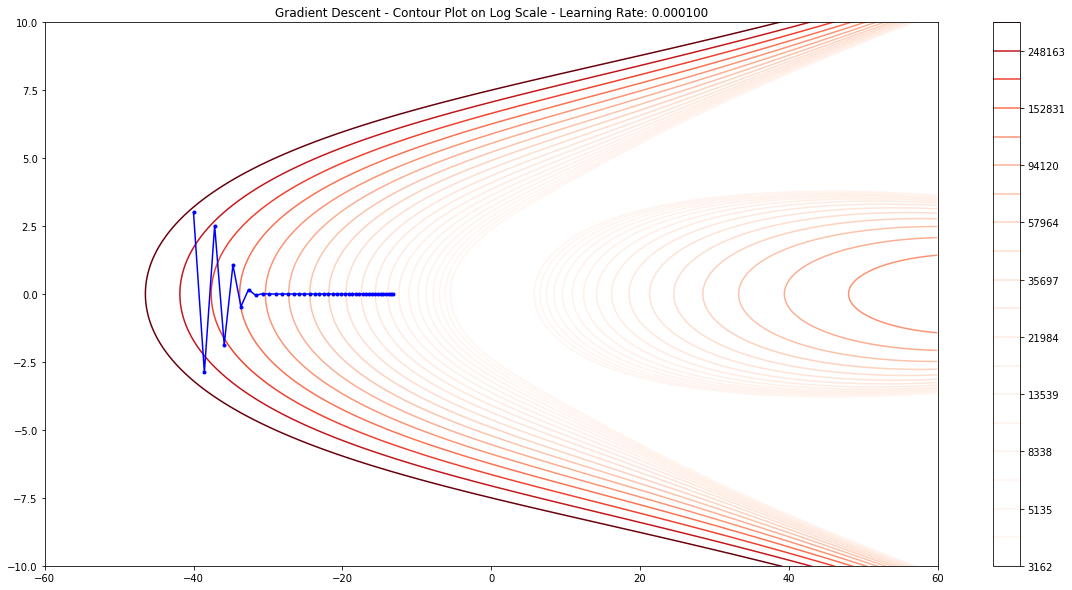

In [8]:
# run model
starting_point = np.array([-40, 3])
iters = 40
lr = 0.0001

betas_path = grad_descent(starting_point, iters, lr)

# plot
delta = 0.05
x = np.arange(-60, 60, delta)
y = np.arange(-20, 20, delta)

X, Y = np.meshgrid(x, y)
Z = (1-X**3)+100*(Y**2-X)**2

plt.subplots(figsize=(20,10))
plt.xlim([-60,60])
plt.ylim([-10,10])
plt.contour(X, Y, Z, np.logspace(3.5,5.5,20,base=10),cmap=cm.Reds)
plt.plot(betas_path[:, 0], betas_path[:, 1],'b.-')

plt.colorbar()
plt.title('Gradient Descent - Contour Plot on Log Scale - Learning Rate: %f' %lr)

Text(0.5, 1.0, 'Gradient Descent - Contour Plot on Log Scale - Learning Rate: 0.000050')

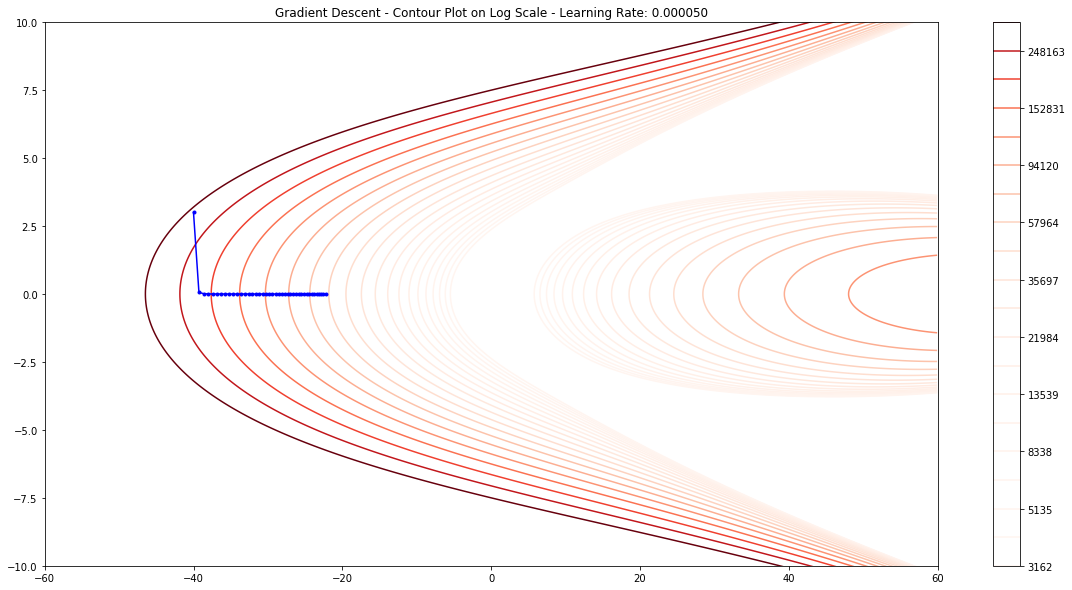

In [9]:
# run model
starting_point = np.array([-40, 3])
iters = 40
lr = 0.00005

betas_path = grad_descent(starting_point, iters, lr)

# plot
delta = 0.05
x = np.arange(-60, 60, delta)
y = np.arange(-20, 20, delta)

X, Y = np.meshgrid(x, y)
Z = (1-X**3)+100*(Y**2-X)**2

plt.subplots(figsize=(20,10))
plt.xlim([-60,60])
plt.ylim([-10,10])
plt.contour(X, Y, Z, np.logspace(3.5,5.5,20,base=10),cmap=cm.Reds)
plt.plot(betas_path[:, 0], betas_path[:, 1],'b.-')

plt.colorbar()
plt.title('Gradient Descent - Contour Plot on Log Scale - Learning Rate: %f' %lr)

Text(0.5, 1.0, 'Gradient Descent - Contour Plot on Log Scale - Learning Rate: 0.000010')

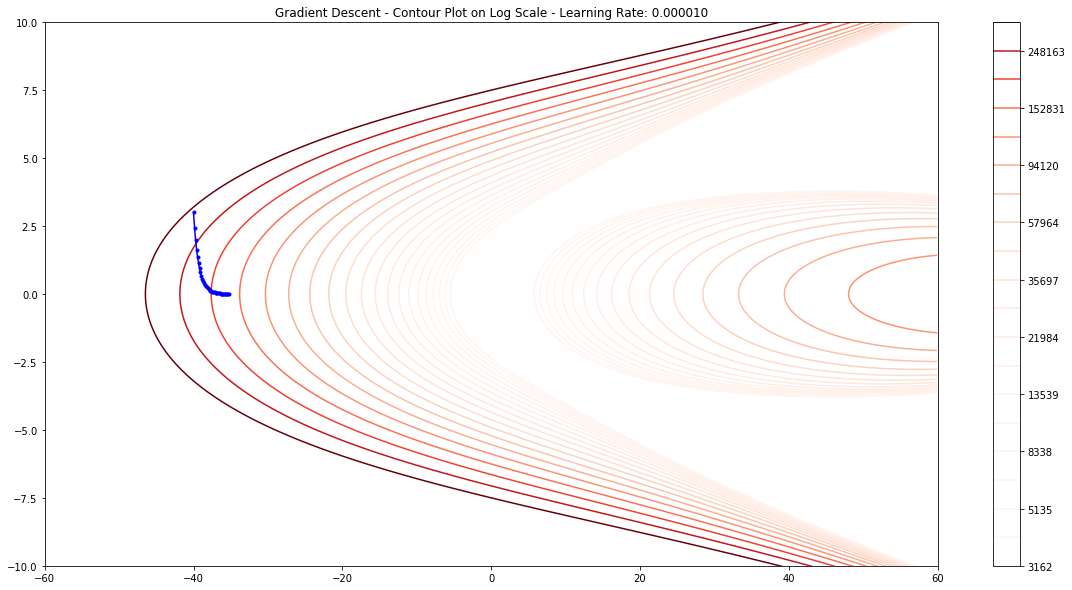

In [10]:
# run model
starting_point = np.array([-40, 3])
iters = 40
lr = 0.00001

betas_path = grad_descent(starting_point, iters, lr)

# plot
delta = 0.05
x = np.arange(-60, 60, delta)
y = np.arange(-20, 20, delta)

X, Y = np.meshgrid(x, y)
Z = (1-X**3)+100*(Y**2-X)**2

plt.subplots(figsize=(20,10))
plt.xlim([-60,60])
plt.ylim([-10,10])
plt.contour(X, Y, Z, np.logspace(3.5,5.5,20,base=10),cmap=cm.Reds)
plt.plot(betas_path[:, 0], betas_path[:, 1],'b.-')

plt.colorbar()
plt.title('Gradient Descent - Contour Plot on Log Scale - Learning Rate: %f' %lr)

### Question 2 - 4

In [11]:
def grad_descent_momentum(starting_point,starting_velocity,iters,lr,alpha):
   
    velocity = starting_velocity
    #velocity_path = [velocity]
    
    betas = starting_point
    betas_path = [betas]
    
    for i in range(iters):
        grad = grad_f(betas)
        
        velocity = alpha*velocity - lr*grad
        #velocity_path.append(velocity)
        
        betas = betas + velocity
        betas_path.append(betas)
    
    return(np.array(betas_path))

Text(0.5, 1.0, 'Gradient Descent with Momentum - Contour Plot on Log Scale - Learning Rate: 0.000010')

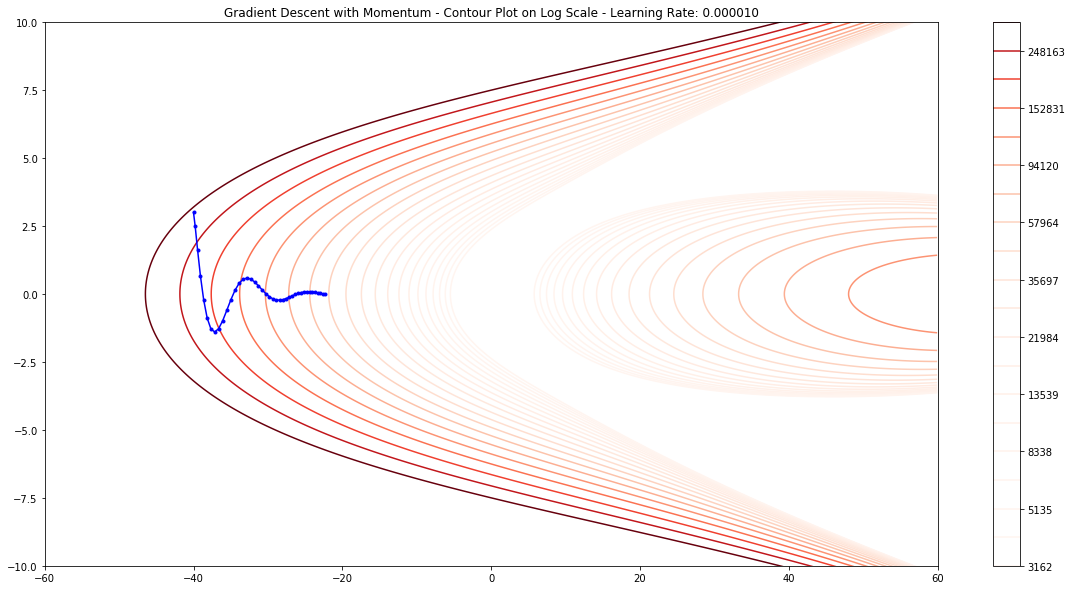

In [12]:
# run model
starting_velocity = np.array([0.1,0.1])
starting_point = np.array([-40, 3])
iters = 40
lr = 0.00001
alpha = 0.8

betas_path = grad_descent_momentum(starting_point, starting_velocity, iters, lr, alpha)

# plot
delta = 0.05
x = np.arange(-60, 60, delta)
y = np.arange(-20, 20, delta)

X, Y = np.meshgrid(x, y)
Z = (1-X**3)+100*(Y**2-X)**2

plt.subplots(figsize=(20,10))
plt.xlim([-60,60])
plt.ylim([-10,10])
plt.contour(X, Y, Z, np.logspace(3.5,5.5,20,base=10),cmap=cm.Reds)
plt.plot(betas_path[:, 0], betas_path[:, 1],'b.-')

plt.colorbar()
plt.title('Gradient Descent with Momentum - Contour Plot on Log Scale - Learning Rate: %f' %lr)

### Question 3 - 1

Since this is a binary classification neural network, we are using Binary Cross Entropy as Loss Function.  

$L = -y_ilog(\hat{y_i} - (1-y_i)log(1-\hat{y_i})$  
$\frac{dL}{d\hat{y}} = \frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}}$  
$\hat{y_i} = sigmoid(\hat{y}_{in})$, where $\hat{y}_{in} = v_1h_1 + v_2h_2 + v_3h_3 + c$ 

Therefore, in respect to V (output layer), we have:

$\frac{dL}{dv_1} = \frac{dL}{d\hat{y}}\frac{d\hat{y}}{dv_1} = (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})\hat{y_i}(1-\hat{y_i})h_1$  
$\frac{dL}{dv_2} = \frac{dL}{d\hat{y}}\frac{d\hat{y}}{dv_2} = (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})\hat{y_i}(1-\hat{y_i})h_2$  
$\frac{dL}{dv_3} = \frac{dL}{d\hat{y}}\frac{d\hat{y}}{dv_3} = (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})\hat{y_i}(1-\hat{y_i})h_3$  
$\frac{dL}{dc} = \frac{dL}{d\hat{y}}\frac{d\hat{y}}{dc} = (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})\hat{y_i}(1-\hat{y_i})$


In respect to H1 (First element of the hidden layer), we have:

$h_1 = ReLu(h_{1_{in}})$, where $h_{1_{in}} = w_{11}x_1+w_{21}x_2+b_1$  
$ReLu'(h_{1_{in}}) = max(0,h_{1_{in}}')$  
$\frac{dL}{dw_{11}} = \frac{dL}{d\hat{y}}\frac{d\hat{y}}{dh_1}\frac{dh_1}{dw_{11}} = (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})\hat{y_i}(1-\hat{y_i})v_1ReLu'(h_{1_{in}})x_1$  
$\frac{dL}{dw_{21}} = \frac{dL}{d\hat{y}}\frac{d\hat{y}}{dh_1}\frac{dh_1}{dw_{21}} = (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})\hat{y_i}(1-\hat{y_i})v_1ReLu'(h_{1_{in}})x_2$   
$\frac{dL}{db_1} = \frac{dL}{d\hat{y}}\frac{d\hat{y}}{dh_1}\frac{dh_1}{db_1} = (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})\hat{y_i}(1-\hat{y_i})v_1ReLu'(h_{1_{in}})$  


In respect to H2 (Second element of the hidden layer), we have:

$h_2 = ReLu(h_{2_{in}})$, where $h_{2_{in}} = w_{12}x_1+w_{22}x_2+b_2$  
$ReLu'(h_{2_{in}}) = max(0,h_{2_{in}}')$  
$\frac{dL}{dw_{12}} = \frac{dL}{d\hat{y}}\frac{d\hat{y}}{dh_2}\frac{dh_2}{dw_{12}} = (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})\hat{y_i}(1-\hat{y_i})v_2ReLu'(h_{2_{in}})x_1$  
$\frac{dL}{dw_{22}} = \frac{dL}{d\hat{y}}\frac{d\hat{y}}{dh_2}\frac{dh_2}{dw_{22}} = (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})\hat{y_i}(1-\hat{y_i})v_2ReLu'(h_{2_{in}})x_2$  
$\frac{dL}{db_2} = \frac{dL}{d\hat{y}}\frac{d\hat{y}}{dh_2}\frac{dh_2}{db_2} = (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})\hat{y_i}(1-\hat{y_i})v_2ReLu'(h_{2_{in}})$  


In respect to H3 (Third element of the hidden layer), we have:

$h_3 = ReLu(h_{3_{in}})$, where $h_{2_{in}} = w_{13}x_1+w_{23}x_2+b_3$  
$ReLu'(h_{3_{in}}) = max(0,h_{3_{in}}')$  
$\frac{dL}{dw_{13}} = \frac{dL}{d\hat{y}}\frac{d\hat{y}}{dh_3}\frac{dh_3}{dw_{13}} = (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})\hat{y_i}(1-\hat{y_i})v_3ReLu'(h_{3_{in}})x_1$  
$\frac{dL}{dw_{23}} = \frac{dL}{d\hat{y}}\frac{d\hat{y}}{dh_3}\frac{dh_3}{dw_{23}} = (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})\hat{y_i}(1-\hat{y_i})v_3ReLu'(h_{3_{in}})x_2$  
$\frac{dL}{db_3} = \frac{dL}{d\hat{y}}\frac{d\hat{y}}{dh_3}\frac{dh_3}{db_3} = (\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})\hat{y_i}(1-\hat{y_i})v_3ReLu'(h_{3_{in}})$  

### Question 3 - 2

In [54]:
# x, y: input values
# W, V: weight for hidden layers and output layers
# B, C: bias for hidden layers and output layers
def grad_f(x1,x2, y, W, V, B, C):
    Len = len(x1)
    
    yhat = []
    Hidden = []
    dLdyhat_ = []
    
    dLdv1_ = []
    dLdv2_ = []
    dLdv3_ = []
    dLdc_ = []
    
    dLdw11_ = []
    dLdw21_ = []
    dLdb1_ = []
    
    dLdw12_ = [] 
    dLdw22_ = []
    dLdb2_ = []

    dLdw13_ = []
    dLdw23_ = []
    dLdb3_ = []
    
    for i in range(Len):
        X = np.array([x1[i],x2[i]])
        
        H_in = np.matmul(X,W) + b
        H = ff_nn__ReLu(H_in)
        Hidden.append(H)
        
        # yhat
        y_in = np.matmul(H,V) + C
        yh = ff_nn__Sigmoid(y_in)
        yhat.append(yh[0])

        dLdyhat_i = y[i]/yh[0] - (1-y[i])/(1-yh[0])
        dLdyhat_.append(dLdyhat_i)
    
        # output layer
        dLdv1_i = dLdyhat_i * yh[0] * (1-yh[0]) * H[0] 
        dLdv2_i = dLdyhat_i * yh[0] * (1-yh[0]) * H[1] 
        dLdv3_i = dLdyhat_i * yh[0] * (1-yh[0]) * H[2] 
        dLdc_i = dLdyhat_i * yh[0] * (1-yh[0])
        
        dLdv1_.append(dLdv1_i)
        dLdv2_.append(dLdv2_i)
        dLdv3_.append(dLdv3_i)
        dLdc_.append(dLdc_i)

        # H1 - first element of hidden layer
        dLdw11_i = dLdyhat_i * yh[0] * (1-yh[0]) * V[0] * ff_nn__ReLu_grad(H_in[0]) * x1[i]
        dLdw21_i = dLdyhat_i * yh[0] * (1-yh[0]) * V[0] * ff_nn__ReLu_grad(H_in[0]) * x2[i]
        dLdb1_i = dLdyhat_i * yh[0] * (1-yh[0]) * V[0] * ff_nn__ReLu_grad(H_in[0])

        dLdw11_.append(dLdw11_i)
        dLdw21_.append(dLdw21_i)
        dLdb1_.append(dLdb1_i)
        
        # H2 - first element of hidden layer
        dLdw12_i = dLdyhat_i * yh[0] * (1-yh[0]) * V[1] * ff_nn__ReLu_grad(H_in[1]) * x1[i]
        dLdw22_i = dLdyhat_i * yh[0] * (1-yh[0]) * V[1] * ff_nn__ReLu_grad(H_in[1]) * x2[i]
        dLdb2_i = dLdyhat_i * yh[0] * (1-yh[0]) * V[1] * ff_nn__ReLu_grad(H_in[1])
        
        dLdw12_.append(dLdw12_i)
        dLdw22_.append(dLdw22_i)
        dLdb2_.append(dLdb2_i)
        
        # H3 - first element of hidden layer
        dLdw13_i = dLdyhat_i * yh[0] * (1-yh[0]) * V[2] * ff_nn__ReLu_grad(H_in[2]) * x1[i]
        dLdw23_i = dLdyhat_i * yh[0] * (1-yh[0]) * V[2] * ff_nn__ReLu_grad(H_in[2]) * x1[i]
        dLdb3_i = dLdyhat_i * yh[0] * (1-yh[0]) * V[2] * ff_nn__ReLu_grad(H_in[2]) * x1[i]
        
        dLdw13_.append(dLdw13_i)
        dLdw23_.append(dLdw23_i)
        dLdb3_.append(dLdb3_i)
        
    # take average of all defferentiate    
    dLdv1 = -np.mean(dLdv1_)
    dLdv2 = -np.mean(dLdv2_)
    dLdv3 = -np.mean(dLdv3_)
    dLdc = -np.mean(dLdc_)
    
    dLdw11 = -np.mean(dLdw11_)
    dLdw21 = -np.mean(dLdw21_)
    dLdb1 = -np.mean(dLdb1_)
    
    dLdw12 = -np.mean(dLdw12_)
    dLdw22 = -np.mean(dLdw22_)
    dLdb2 = -np.mean(dLdb2_)
    
    dLdw13 = -np.mean(dLdw13_)
    dLdw23 = -np.mean(dLdw23_)
    dLdb3 = -np.mean(dLdb3_)
    
    dLdW = np.array([[dLdw11,dLdw12,dLdw13],[dLdw21,dLdw22,dLdw23]])
    dLdV = np.array([dLdv1,dLdv2,dLdv3])
    dLdB = np.array([dLdb1,dLdb2,dLdb3])
    dLdC = np.array([dLdc])
    
    # calculate yhat
    yhat = np.array(yhat)
    
    
    return(dLdW, dLdV, dLdB, dLdC, yhat)


def ff_nn__ReLu_grad(Input):
    if Input > 0: Output = 1
    else: Output = 0
    return(Output)


def Loss(y, yhat):
    L = []
    for i in range(len(y)):
        loss = -y[i]* np.log(yhat[i])-(1-y[i])*np.log(1-yhat[i])
        L.append(loss)
    return (np.mean(L))


def ff_nn__GradientDescent(x1, x2, y, W, V, B, C, lr, iters):
    loss = []
    for i in tqdm(range(iters)):
        dLdW, dLdV, dLdB, dLdC, yhat = grad_f(x1, x2, y, W, V, B, C)
        # update weights
        W = W - lr * dLdW
        V = V - lr * dLdV
        B = B - lr * dLdB
        C = C - lr * dLdC
        
        # store loss
        L = Loss(y, yhat)
        loss.append(L)
        
    return(loss)

### Question 3 - 3

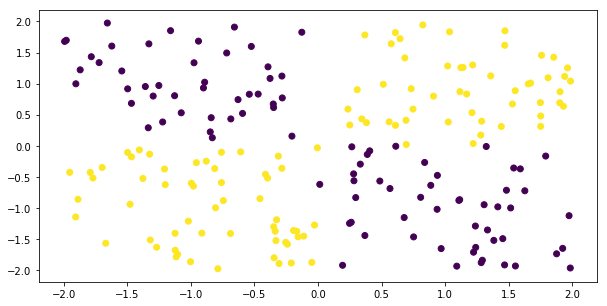

In [141]:
n = 200
x1 = np.random.uniform(low=-2, high=2, size=n)
x2 = np.random.uniform(low=-2, high=2, size=n)
y = np.zeros(n)
y[(x1 < 0) & (x2 <0)] = 1
y[(x1 > 0) & (x2 >0)] = 1
plt.figure(figsize=(10,5))
plt.scatter(x1, x2, c=y)

### Question 3 - 4

100%|██████████| 500/500 [00:04<00:00, 123.10it/s]


Text(0.5, 0, 'Iters')

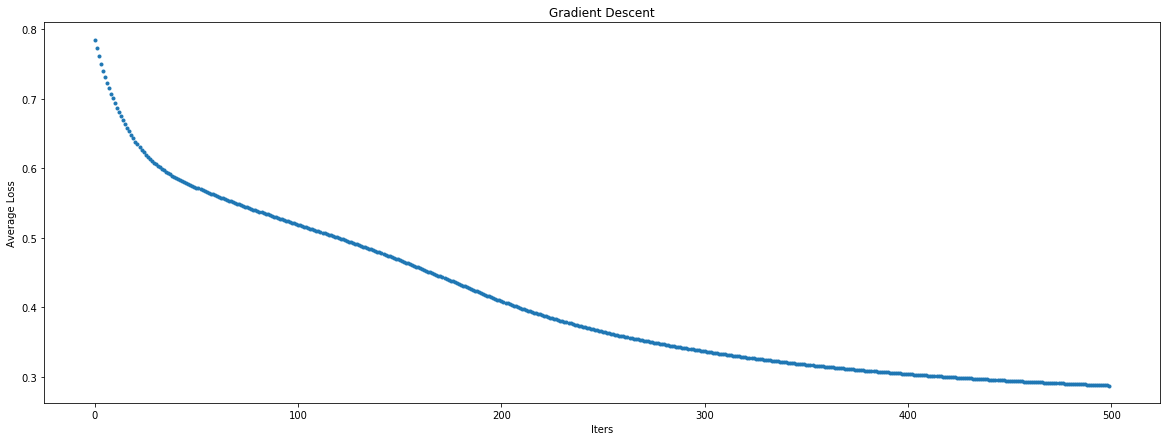

In [142]:
W = np.array([[1,-1,0],[0,0,0.5]])
V = np.array([1,0,-1])
B = np.array([0,0,1])
C = np.array([1])

lr = 0.1
iters = 500

L = ff_nn__GradientDescent(x1, x2, y, W, V, B, C, lr, iters)

plt.figure(figsize=(20,7))
plt.plot(list(range(iters)), L, '.')
plt.title('Gradient Descent')
plt.ylabel('Average Loss')
plt.xlabel('Iters')

### Question 3 - 5

In [143]:
def ff_nn__GradientDescent_momentum(x1, x2, y, W, V, B, C, lr, iters, alpha, velocity):
    loss = []
    for i in tqdm(range(iters)):
        dLdW, dLdV, dLdB, dLdC, yhat = grad_f(x1, x2, y, W, V, B, C)
        
        # update velocity
        # velocity is a 4D array, it contains velocity for W,V,B,C repectively
        velocity[0] = alpha*velocity[0] - lr*dLdW
        velocity[1] = alpha*velocity[1] - lr*dLdV
        velocity[2] = alpha*velocity[2] - lr*dLdB
        velocity[3] = alpha*velocity[3] - lr*dLdC
        
        # update weights
        W = W + velocity[0]
        V = V + velocity[1]
        B = B + velocity[2]
        C = C + velocity[3]
        
        # store loss
        L = Loss(y, yhat)
        loss.append(L)
        
    return(loss)

100%|██████████| 200/200 [00:01<00:00, 125.34it/s]


Text(0.5, 0, 'Iters')

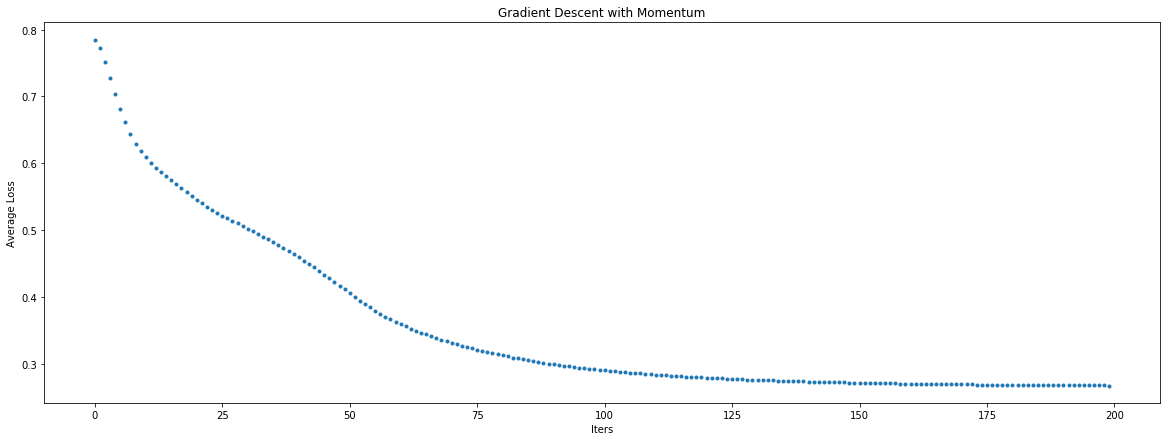

In [144]:
W = np.array([[1,-1,0],[0,0,0.5]])
V = np.array([1,0,-1])
B = np.array([0,0,1])
C = np.array([1])

lr = 0.1
iters = 200

alpha = 0.8
Velocity_W = np.array([[0,0,0],[0,0,0]])
Velocity_V = np.array([0,0,0])
Velocity_B = np.array([0,0,0])
Velocity_C = np.array([0])
Velocity = np.array([Velocity_W,Velocity_V,Velocity_B,Velocity_C])

L = ff_nn__GradientDescent_momentum(x1, x2, y, W, V, B, C, lr, iters, alpha, Velocity)

plt.figure(figsize=(20,7))
plt.plot(list(range(iters)), L, '.')
plt.title('Gradient Descent with Momentum')
plt.ylabel('Average Loss')
plt.xlabel('Iters')

Compared to Gradient Descent(GD), Gradient Descent with Momemtum(GDM) does converge quicker. It takes about 500 iterations for GD to converge, but GDM only takes 150 iterations

### Question 3 - 6

In [174]:
def ff_nn__GradientDescent_momentum_yhat(x1, x2, y, W, V, B, C, lr, iters, alpha, velocity):
    loss = []
    for i in tqdm(range(iters)):
        dLdW, dLdV, dLdB, dLdC, yhat = grad_f(x1, x2, y, W, V, B, C)
        
        # update velocity
        # velocity is a 4D array, it contains velocity for W,V,B,C repectively
        velocity[0] = alpha*velocity[0] - lr*dLdW
        velocity[1] = alpha*velocity[1] - lr*dLdV
        velocity[2] = alpha*velocity[2] - lr*dLdB
        velocity[3] = alpha*velocity[3] - lr*dLdC
        
        # update weights
        W = W + velocity[0]
        V = V + velocity[1]
        B = B + velocity[2]
        C = C + velocity[3]
        
        # store loss
        L = Loss(y, yhat)
        loss.append(L)
        
    return(yhat,loss)

In [177]:
W = np.array([[1,-1,0],[0,0,0.5]])
V = np.array([1,0,-1])
B = np.array([0,0,1])
C = np.array([1])

lr = 0.1
iters = 200

alpha = 0.8
Velocity_W = np.array([[0,0,0],[0,0,0]])
Velocity_V = np.array([0,0,0])
Velocity_B = np.array([0,0,0])
Velocity_C = np.array([0])
Velocity = np.array([Velocity_W,Velocity_V,Velocity_B,Velocity_C])

yhat,loss = ff_nn__GradientDescent_momentum_yhat(x1, x2, y, W, V, B, C, lr, iters, alpha, Velocity)

100%|██████████| 200/200 [00:01<00:00, 120.28it/s]


Text(0.5, 0, 'x1')

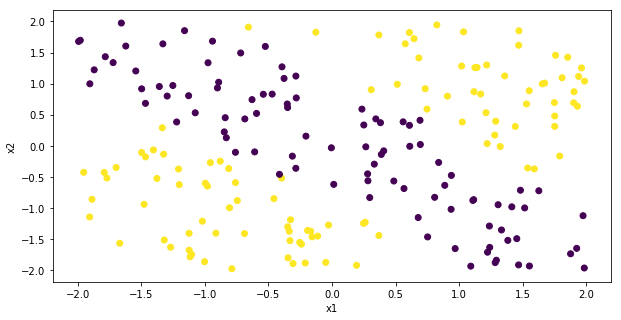

In [180]:
# use 0.5 as threshold for classification
for i in range(len(yhat)):
    if yhat[i] >= 0.5: yhat[i] = 1
    else: yhat[i] = 0

plt.figure(figsize=(10,5))
plt.scatter(x1,x2,c=yhat)
plt.ylabel('x2')
plt.xlabel('x1')